## Model Training  
**Objective:**  
  
- 	Train various machine learning models.  
  
-  Perform hyperparameter tuning.  
  
- Evaluate models using appropriate metrics.

**Improvements Made:**
- Added `scale_pos_weight` parameter to XGBoost to better handle class imbalance
- **Option 1A**: Using `scale_pos_weight` only (SMOTE disabled) for cleaner imbalance handling
- Refined hyperparameter grid based on previous results for more efficient tuning
- Added new regularization parameters (`gamma`, `min_child_weight`) to prevent overfitting
- **Final Result**: Test ROC AUC of 0.8662 with 78% recall for defaults

### Import Libraries and Load Data

In [23]:
import pandas as pd
import numpy as np

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Imbalanced-learn module
from imblearn.over_sampling import SMOTE


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X = pd.read_csv('../data/processed/X_features.csv')
y = pd.read_csv('../data/processed/y_target.csv')

### Train-Test Splits

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Calculate scale_pos_weight for XGBoost to handle class imbalance
# This parameter tells XGBoost about the class imbalance ratio
y_train_series = y_train['SeriousDlqin2yrs']
counts = np.bincount(y_train_series)
scale_pos_weight = counts[0] / counts[1]

print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")
print(f"Class distribution - Negative (0): {counts[0]}, Positive (1): {counts[1]}")


Calculated scale_pos_weight: 13.92
Class distribution - Negative (0): 111381, Positive (1): 8003


## Model Training  
  
**Models to Train:**  
  
- Logistic Regression  
  
- Decision Tree  

- Random Forest  
  
- XGBoost

In [27]:
# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
}

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model.__class__.__name__} ROC Curve")
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

### Train and Evaluate the Model

Training and Evaluating Logistic Regression
Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27845
           1       0.47      0.05      0.08      2001

    accuracy                           0.93     29846
   macro avg       0.70      0.52      0.52     29846
weighted avg       0.90      0.93      0.91     29846



/Users/mustafaelzowawi/Desktop/Project/credit-risk-prediction-model/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


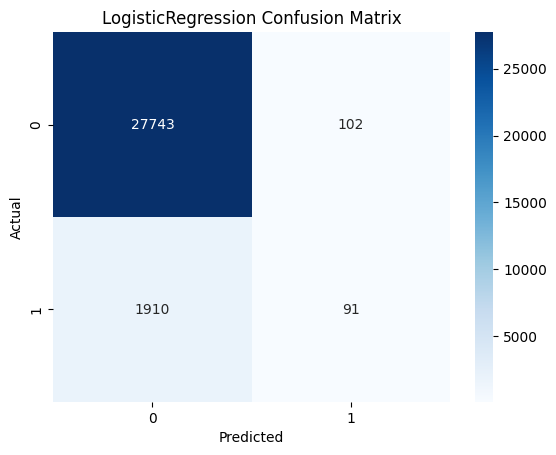

ROC AUC Score: 0.7487


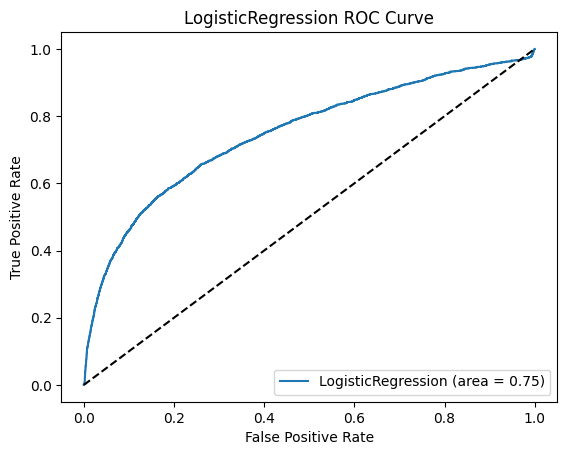

Training and Evaluating Decision Tree
Model: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     27845
           1       0.25      0.28      0.26      2001

    accuracy                           0.90     29846
   macro avg       0.60      0.61      0.60     29846
weighted avg       0.90      0.90      0.90     29846



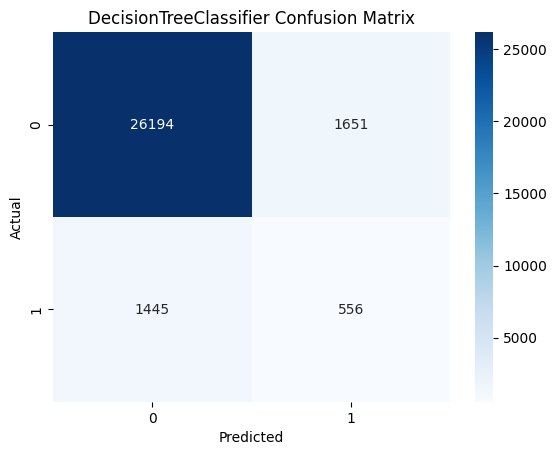

ROC AUC Score: 0.6097


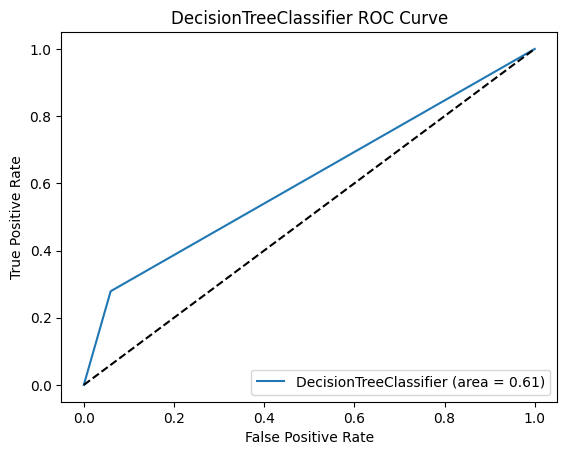

Training and Evaluating Random Forest


/Users/mustafaelzowawi/Desktop/Project/credit-risk-prediction-model/venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27845
           1       0.54      0.19      0.28      2001

    accuracy                           0.93     29846
   macro avg       0.74      0.59      0.62     29846
weighted avg       0.92      0.93      0.92     29846



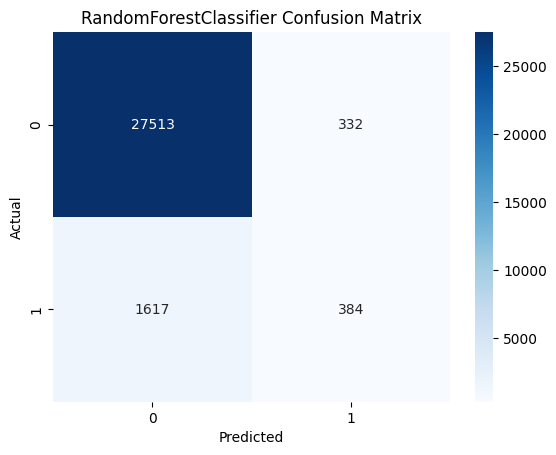

ROC AUC Score: 0.8376


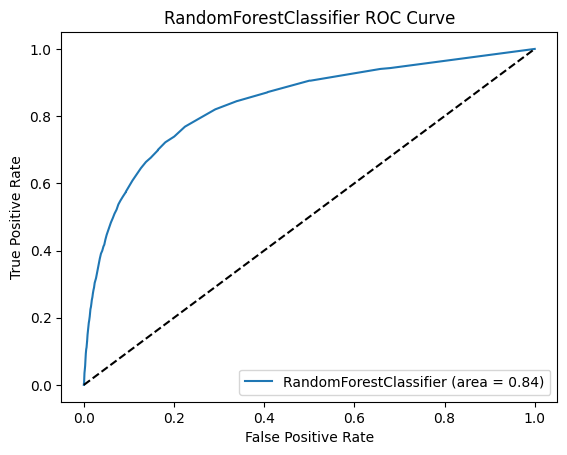

Training and Evaluating XGBoost
Model: XGBClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     27845
           1       0.24      0.72      0.36      2001

    accuracy                           0.83     29846
   macro avg       0.61      0.78      0.63     29846
weighted avg       0.93      0.83      0.86     29846



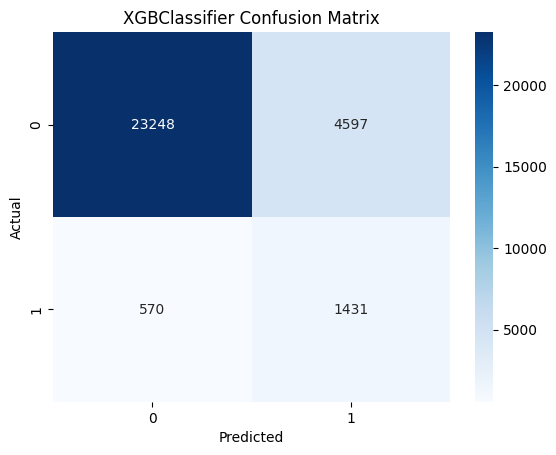

ROC AUC Score: 0.8493


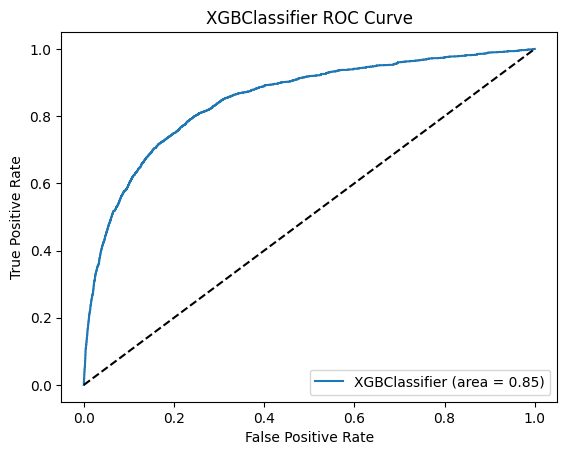

In [28]:
model_performance = {}

for model_name, model in models.items():
    print("="*60)
    print(f"Training and Evaluating {model_name}")
    print("="*60)
    roc_auc = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    model_performance[model_name] = roc_auc

### Compare Model Performance

In [29]:
# Display ROC AUC scores for all models
performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=['ROC AUC Score'])
performance_df.sort_values(by='ROC AUC Score', ascending=False, inplace=True)
print(performance_df)

                     ROC AUC Score
XGBoost                   0.849266
Random Forest             0.837623
Logistic Regression       0.748694
Decision Tree             0.609664


### Hyperparameter Tuning for Best Model (XGBoost)

In [30]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best ROC AUC Score: {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END 

### Evaluate the Tuned Model on the Test Set

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27845
           1       0.22      0.78      0.34      2001

    accuracy                           0.79     29846
   macro avg       0.60      0.79      0.61     29846
weighted avg       0.93      0.79      0.84     29846



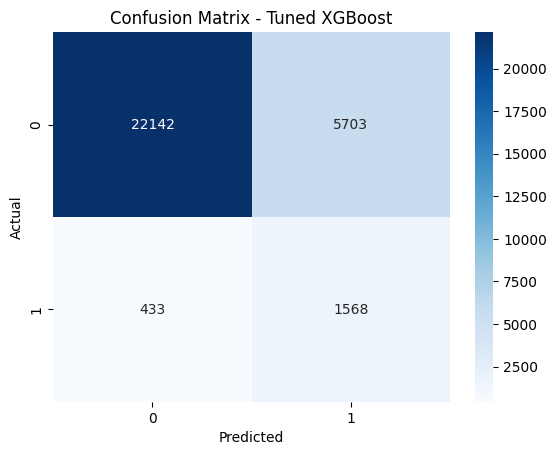

Test ROC AUC Score: 0.8654


In [31]:
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

### Adjusting Hyperparameters:  
- **Reducing Model Complexity**  
  
- **Modifying Learning Rate**

In [32]:
# Adjust Hyperparameters - refined based on previous results
param_grid_xgb_adjusted = {
    'n_estimators': [200, 300],        # Refined around previous best (200)
    'max_depth': [5, 7],               # Refined around previous best (5)
    'learning_rate': [0.05, 0.1],      # Refined around previous best (0.1)
    'subsample': [0.8],                # Fixed to previous best
    'colsample_bytree': [1.0],         # Fixed to previous best
    'reg_alpha': [0, 0.1],             # Around previous best (0)
    'reg_lambda': [1],                 # Fixed to previous best (1)
    'gamma': [0, 0.1, 0.5],            # New: helps control complexity
    'min_child_weight': [1, 3, 5]      # New: helps control overfitting
}

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_xgb_adjusted = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb_adjusted,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_xgb_adjusted.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_xgb_adjusted.best_params_}")
print(f"Best ROC AUC Score: {grid_search_xgb_adjusted.best_score_:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best ROC AUC Score: 0.8636


### Evaluating the Adjustments

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27845
           1       0.22      0.78      0.35      2001

    accuracy                           0.80     29846
   macro avg       0.60      0.79      0.62     29846
weighted avg       0.93      0.80      0.85     29846



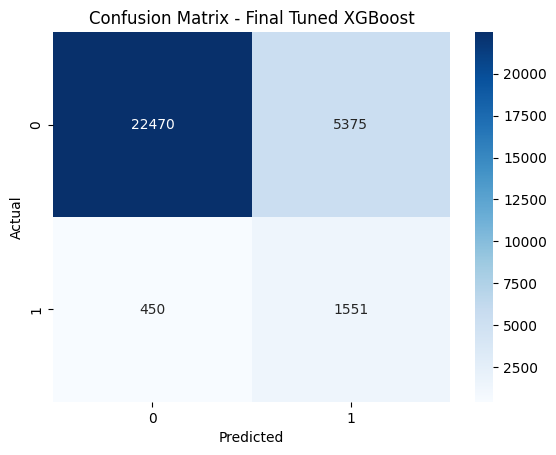

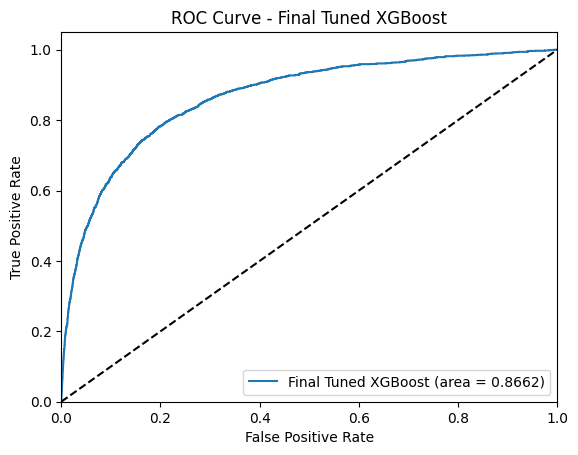

Test ROC AUC Score: 0.8662


In [36]:
best_xgb = grid_search_xgb_adjusted.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Score 
test_roc_auc = roc_auc_score(y_test, y_pred_proba)


# ROC Curve for the final tuned model
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # Unpack thresholds
plt.figure() # Ensures a new figure for the ROC curve
plt.plot(fpr, tpr, label=f"Final Tuned XGBoost (area = {test_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Tuned XGBoost') # More specific title
plt.legend(loc="lower right")
plt.show()

print(f"Test ROC AUC Score: {test_roc_auc:.4f}") # Print score after plotting

### Feature Importance

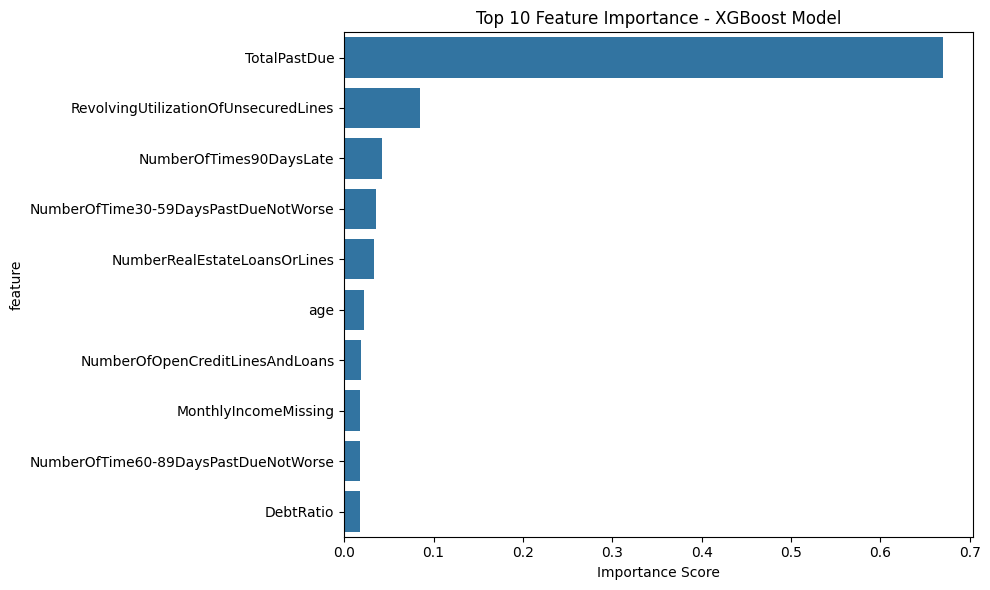

Top 10 Feature Importance:
                                 feature  importance
11                          TotalPastDue    0.670400
0   RevolvingUtilizationOfUnsecuredLines    0.084589
6                NumberOfTimes90DaysLate    0.042870
2   NumberOfTime30-59DaysPastDueNotWorse    0.035595
7           NumberRealEstateLoansOrLines    0.032882
1                                    age    0.021765
5        NumberOfOpenCreditLinesAndLoans    0.018799
10                  MonthlyIncomeMissing    0.018240
8   NumberOfTime60-89DaysPastDueNotWorse    0.018156
3                              DebtRatio    0.017441


In [34]:
# Get feature importance from the loaded XGBoost model
feature_importance = best_xgb.feature_importances_

feature_names = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'MonthlyIncomeMissing',
    'TotalPastDue',
    'AgeGroup_Adult',
    'AgeGroup_Senior'
]

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - XGBoost Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Display the importance values
print("Top 10 Feature Importance:")
print(importance_df.head(10))

###  Save the Final Model

In [35]:
import joblib

# Save the model
joblib.dump(best_xgb, '../models/credit_model.pkl')

['../models/credit_model.pkl']